# Part 1: plotting simulation data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.size"] = 16

In [4]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


In [5]:
start = 1000
df["wealth"] = df["return"].cumprod() * start
df.head()

,year,return,wealth
0,1970,1.0401,1040.100000
1,1971,1.1431,1188.938310
2,1972,1.1898,1414.598801
3,1973,0.8534,1207.218617
4,1974,0.7353,887.667849


In [6]:
df = df.set_index("year")
df.head()

,return,wealth
year,,
1970,1.0401,1040.100000
1971,1.1431,1188.938310
1972,1.1898,1414.598801
1973,0.8534,1207.218617
1974,0.7353,887.667849


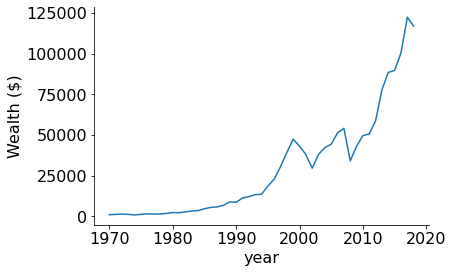

In [9]:
ax = df["wealth"].plot.line()
ax.set_ylabel("Wealth ($)")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In [10]:
import random

In [22]:
random.choice([3,4,5])

3

In [23]:
random.choices([3,4,5], k=10)

[3, 3, 3, 3, 5, 5, 4, 3, 4, 5]

In [36]:
def sim_year(start=1000, years=10, init_year=2020):
    returns = pd.Series(random.choices(list(df["return"]), k=years),
                        index=range(init_year, init_year+years))
    return returns.cumprod() * start

sim_year(init_year=2021)

2021    1143.100000
2022    1383.608240
2023    1523.075951
2024    1776.058866
2025    2368.552104
2026    3090.249930
2027    3259.904651
2028    3328.688639
2029    3805.023983
2030    4260.104852
dtype: float64

In [56]:
def sim_many_years(sim_count=1):
    sims = pd.DataFrame()
    for i in range(sim_count):
        sims["sim"+str(i)] = sim_year(init_year=2021)
    return sims
results = sim_many_years(500)
results

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim490,sim491,sim492,sim493,sim494,sim495,sim496,sim497,sim498,sim499
2021,1375.800000,853.400000,1323.900000,1210.400000,928.200000,1210.400000,881.100000,1052.500000,1210.400000,1150.600000,...,853.400000,1049.100000,1238.400000,1108.800000,1040.100000,1210.400000,1021.100000,1100.800000,1238.400000,1325.000000
2022,1703.790720,1113.430980,1575.176220,1602.448560,979.158180,1471.241200,1160.673030,1005.874250,1614.189440,1392.686240,...,1032.955360,1285.776960,1254.746880,1315.812960,1119.355620,762.552000,871.406740,1266.580480,1436.544000,1767.020000
2023,2154.613745,1174.558341,1836.812990,1248.307428,1192.908411,1681.775816,1326.765341,1193.670972,2138.801008,1910.765521,...,1174.366949,1693.239679,1333.419509,1368.577060,1354.868042,964.323259,917.155594,1333.075955,1119.067776,1901.666924
2024,2772.556966,1556.289802,2251.198001,1644.395375,929.275652,1059.518764,1677.827450,1107.965397,2444.863432,2004.584108,...,1611.231454,2141.270898,1351.820699,1564.420437,1516.910260,1102.317918,876.525601,1777.790094,871.753798,2026.416274
2025,2924.770344,1674.879084,2768.073062,2036.419233,844.711568,1129.023195,1907.522028,1266.515245,2086.446453,2321.107939,...,2134.881676,2820.696153,1370.475824,1646.552510,2081.200877,1260.059612,796.761771,1384.898483,1120.901033,2605.566045
2026,3698.664577,2217.372420,1743.886029,2362.246310,936.616186,1152.845584,2001.181359,1539.449280,2115.239414,2827.805802,...,2616.510982,3356.064283,1442.425805,1843.480190,2577.359166,1469.355513,1024.476286,1457.605653,1274.352384,2477.372196
2027,4282.683714,1396.944625,2069.469550,3082.022761,688.693882,1344.333236,2027.596953,1723.567414,2049.666992,3635.992700,...,2753.877809,3532.257658,1824.091673,1983.953381,2611.380307,1748.239189,1318.296084,1135.474804,1561.846282,3132.884879
2028,3336.210613,1620.455764,2352.779932,3730.480349,885.522593,1664.822279,2454.203352,2248.738405,2512.071866,4429.729907,...,3482.553877,3673.901190,2164.649588,2729.523061,3107.020290,2316.416926,1125.033878,1324.077169,1582.462653,3653.257057
2029,2453.115664,1876.325730,3098.375892,4544.844210,821.942071,2105.334254,3201.999113,2668.577865,2676.863780,4607.362076,...,3980.907337,4284.136178,2193.222963,2900.664157,4091.635019,2202.449213,1361.741006,1816.633876,1771.725186,5026.151060
2030,2804.156515,2581.448939,3141.133480,6252.796664,854.901948,2437.766533,2354.429948,3304.766829,3176.634248,5301.230805,...,4818.490241,4094.348945,2539.532869,2555.775189,3719.296233,2613.646481,1465.505671,1930.536820,1906.730646,5272.935077


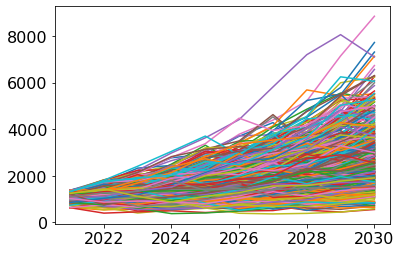

In [57]:
ax = results.plot.line()
ax.legend().set_visible(False)

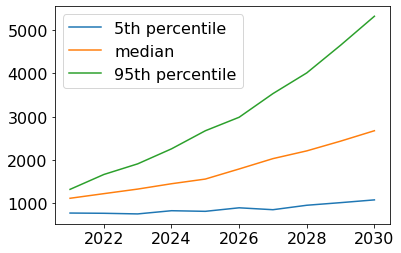

In [58]:
plot_df = pd.DataFrame({
    "5th percentile": results.quantile(0.05, axis=1),
    "median": results.quantile(0.5, axis=1),
    "95th percentile": results.quantile(0.95, axis=1),
})
plot_df.plot.line()

# Part 2: stacked/clustered bar plots

#### Question: In what decades were the Pacer fire hydrants mostly installed in Madison?

In [60]:
df = pd.read_csv("Fire_Hydrants.csv")
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [65]:
df[["Style", "year_manufactured"]]

,Style,year_manufactured
0,Pacer,1996.0
1,Pacer,1995.0
2,Pacer,1996.0
3,Pacer,1995.0
4,Pacer,1996.0
...,...,...
10104,NaN,2018.0
10105,NaN,2017.0
10106,NaN,2000.0
10107,NaN,2017.0


In [69]:
df = df[~df["year_manufactured"].isna()]
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [70]:
df["Style"]

0        Pacer
1        Pacer
2        Pacer
3        Pacer
4        Pacer
         ...  
10102      NaN
10104      NaN
10105      NaN
10106      NaN
10107      NaN
Name: Style, Length: 7256, dtype: object

In [76]:
df.groupby("Style").agg("count")["OBJECTID"].sort_values(ascending=False).head()

Style
Pacer      3101
Mueller    1209
M-3         550
WB-59       481
K-11        260
Name: OBJECTID, dtype: int64

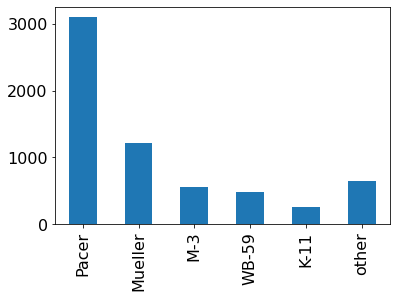

In [82]:
counts = df["Style"].value_counts()
top5 = counts[:5]
top5["other"] = counts[5:].sum()
top5.plot.bar()

In [87]:
df.loc[~df["Style"].isin(top5.index), "Style"] = "other"

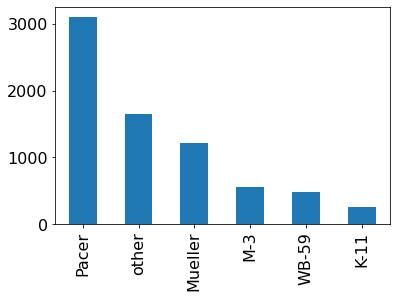

In [89]:
df["Style"].value_counts().plot.bar()

In [95]:
df["decade"] = (df["year_manufactured"] // 10 * 10).astype(int)

In [99]:
df = df[["decade", "Style", "OBJECTID"]]
df.head()

,decade,Style,OBJECTID
0,1990,Pacer,2536
1,1990,Pacer,2537
2,1990,Pacer,2538
3,1990,Pacer,2539
4,1990,Pacer,2540


In [103]:
counts = df.groupby(by=["decade", "Style"], as_index=False).agg("count")
counts.head()

,decade,Style,OBJECTID
0,1900,other,1
1,1930,M-3,8
2,1930,other,1
3,1940,M-3,68
4,1950,M-3,370


In [107]:
plot_df = counts.pivot(index="decade", columns="Style", values="OBJECTID").fillna(0)
plot_df.head()

Style,K-11,M-3,Mueller,Pacer,WB-59,other
decade,,,,,,
1900,0.0,0.0,0.0,0.0,0.0,1.0
1930,0.0,8.0,0.0,0.0,0.0,1.0
1940,0.0,68.0,0.0,0.0,0.0,0.0
1950,0.0,370.0,0.0,0.0,0.0,1.0
1960,46.0,98.0,0.0,1.0,101.0,104.0


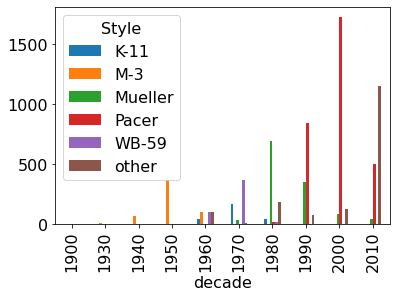

In [108]:
plot_df.plot.bar() # cluster (attempt 1)

In [ ]:
# x-axis is quantitative (especially time): use line plot
# y-axis has categories that sum to a whole: stacked bar plot

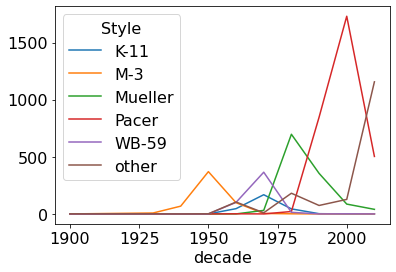

In [109]:
plot_df.plot.line()

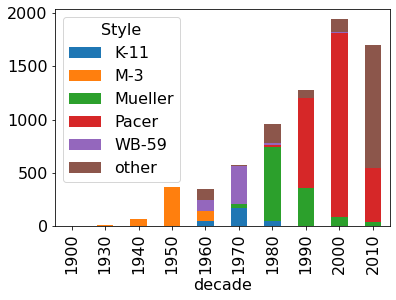

In [111]:
plot_df.plot.bar(stacked=True)